In [ ]:
from pathlib import Path

# Base path
root_data = Path("/mnt/data")
project_dir = root_data / "gmtsar_test_2"

# GMTSAR folders
data_dir     = project_dir / "data"
orbit_dir    = project_dir / "orbit"
topo_dir     = project_dir / "topo"
reframed_dir = project_dir / "reframed"
p2p_dir      = project_dir / "p2p"
iw1_dir      = p2p_dir / "IW1"
intf_dir     = iw1_dir / "intf"

# One example interferogram path (update if needed)
ifg_path     = intf_dir / "2025146_2025152"

# DEM file path
dem_path     = topo_dir / "dem.grd"

# Print checks
print(f"✅ DEM directory:        {topo_dir}")
print(f"✅ Orbit directory:      {orbit_dir}")
print(f"✅ RAW SLC data dir:     {data_dir}")
print(f"✅ Interferogram folder: {intf_dir}")
print(f"✅ Selected IFG path:    {ifg_path}")


✅ DEM directory:        /mnt/data/gmtsar_test_2/topo
✅ Orbit directory:      /mnt/data/gmtsar_test_2/orbit
✅ RAW SLC data dir:     /mnt/data/gmtsar_test_2/data
✅ Interferogram folder: /mnt/data/gmtsar_test_2/p2p/IW1/intf
✅ Selected IFG path:    /mnt/data/gmtsar_test_2/p2p/IW1/intf/2025146_2025152


In [34]:
def plot_grd(file_path: Path, title='', cmap='viridis', vmin=None, vmax=None, units=None):
    from netCDF4 import Dataset as NetCDFFile
    import matplotlib.pyplot as plt
    import numpy as np

    nc = NetCDFFile(str(file_path))
    x = nc.variables['x'][:]
    y = nc.variables['y'][:]
    z = nc.variables['z'][:]
    z = np.flip(z, axis=0)

    plt.figure(figsize=(10, 10))
    img = plt.imshow(z, extent=[x.min(), x.max(), y.min(), y.max()],
                     cmap=cmap, aspect='auto', vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(img, fraction=0.046, pad=0.04)
    if units:
        cbar.set_label(units, fontsize=12)
    plt.title(title, fontsize=14)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(False)
    plt.show()


In [35]:
!tree -L 2 /mnt/data/gmtsar_test_1/p2p/

/mnt/data/gmtsar_test_1/p2p/
├── IW1
│   ├── SLC
│   ├── config.S1_TOPS.txt
│   ├── corr.cpt
│   ├── corr.ps
│   ├── display_amp.cpt
│   ├── display_amp.ps
│   ├── gmt.conf
│   ├── gmt.history
│   ├── ijdec
│   ├── intf
│   ├── phase.cpt
│   ├── phase.ps
│   ├── phasefilt.ps
│   ├── raw
│   └── topo
├── IW2
│   ├── SLC
│   ├── config.S1_TOPS.txt
│   ├── intf
│   ├── raw
│   └── topo
├── IW3
│   ├── SLC
│   ├── config.S1_TOPS.txt
│   ├── config.s1c-iw3-slc-vv-20250527t053438-20250527t053503-002512-0053bb-006.txt
│   ├── intf
│   ├── raw
│   └── topo
├── config.S1_TOPS.txt
├── p2p.txt
├── raw
│   ├── S1A_IW_SLC__1SDV_20250602T053537_20250602T053604_059463_0761AE_4611.SAFE
│   ├── S1A_OPER_AUX_POEORB_OPOD_20250622T070615_V20250601T225942_20250603T005942.EOF
│   ├── S1C_IW_SLC__1SDV_20250527T053437_20250527T053504_002512_0053BB_AD31.SAFE
│   └── S1C_OPER_AUX_POEORB_OPOD_20250604T071120_V20250514T225942_20250516T005942.EOF
└── topo
    └── dem.grd

19 directories, 19 files


In [14]:
!tree -L 2 /mnt/data/gmtsar_test_1/p2p/IW1/intf


/mnt/data/gmtsar_test_1/p2p/IW1/intf
├── 2025146_2025152
│   ├── S1_20250527_053438_F1.LED -> ../../SLC/S1_20250527_053438_F1.LED
│   ├── S1_20250527_053438_F1.PRM
│   ├── S1_20250527_053438_F1.SLC -> ../../SLC/S1_20250527_053438_F1.SLC
│   ├── S1_20250602_053538_F1.LED -> ../../SLC/S1_20250602_053538_F1.LED
│   ├── S1_20250602_053538_F1.PRM
│   ├── S1_20250602_053538_F1.SLC -> ../../SLC/S1_20250602_053538_F1.SLC
│   ├── amp.grd
│   ├── amp1.grd
│   ├── amp2.grd
│   ├── conncomp.grd
│   ├── corr.cpt
│   ├── corr.grd
│   ├── corr.pdf
│   ├── corr_ll.grd
│   ├── corr_ll.kml
│   ├── corr_ll.png
│   ├── display_amp.cpt
│   ├── display_amp.grd
│   ├── display_amp.pdf
│   ├── display_amp_ll.grd
│   ├── display_amp_ll.kml
│   ├── display_amp_ll.png
│   ├── filtcorr.grd
│   ├── gauss_200
│   ├── gmt.conf
│   ├── gmt.history
│   ├── ijdec
│   ├── imagfilt.grd
│   ├── landmask_ra.grd -> ../../topo/landmask_ra.grd
│   ├── landmask_ra_patch.grd
│   ├── los.cpt
│   ├── los.grd
│   ├── los.pdf
│   ├

In [27]:
def plot_grd(file_path: Path, title='', cmap='viridis', vmin=None, vmax=None, units=None, scale_factor=1.0):
    from netCDF4 import Dataset as NetCDFFile
    import matplotlib.pyplot as plt
    import numpy as np

    nc = NetCDFFile(str(file_path))
    x = nc.variables['x'][:]
    y = nc.variables['y'][:]
    z = nc.variables['z'][:]
    z = np.flip(z, axis=0) * scale_factor

    plt.figure(figsize=(10, 10))
    img = plt.imshow(z, extent=[x.min(), x.max(), y.min(), y.max()],
                     cmap=cmap, aspect='auto', origin='lower', vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(img, fraction=0.046, pad=0.04)
    if units:
        cbar.set_label(units, fontsize=12)
    plt.title(title, fontsize=14)
    plt.xlabel("Range")
    plt.ylabel("Azimuth")
    plt.grid(False)
    plt.show()


In [26]:
inspect_grd(ifg_path / "unwrap.grd")
inspect_grd(ifg_path / "amp.grd")
inspect_grd(ifg_path / "los.grd")



🧭 Inspecting: unwrap.grd
  Dimensions:
   - x: 2873
   - y: 6102
  Variables:
   - x: shape=(2873,)
   - y: shape=(6102,)
   - z: shape=(6102, 2873)
  X range: 4.0 → 22980.0  (length=2873)
  Y range: 1.0 → 12203.0  (length=6102)
  Sample x[:3]: [ 4. 12. 20.]
  Sample y[:3]: [1. 3. 5.]

🧭 Inspecting: amp.grd
  Dimensions:
   - x: 2873
   - y: 6102
  Variables:
   - x: shape=(2873,)
   - y: shape=(6102,)
   - z: shape=(6102, 2873)
  X range: 4.0 → 22980.0  (length=2873)
  Y range: 1.0 → 12203.0  (length=6102)
  Sample x[:3]: [ 4. 12. 20.]
  Sample y[:3]: [1. 3. 5.]

🧭 Inspecting: los.grd
  Dimensions:
   - x: 2873
   - y: 6102
  Variables:
   - x: shape=(2873,)
   - y: shape=(6102,)
   - z: shape=(6102, 2873)
  X range: 4.0 → 22980.0  (length=2873)
  Y range: 1.0 → 12203.0  (length=6102)
  Sample x[:3]: [ 4. 12. 20.]
  Sample y[:3]: [1. 3. 5.]


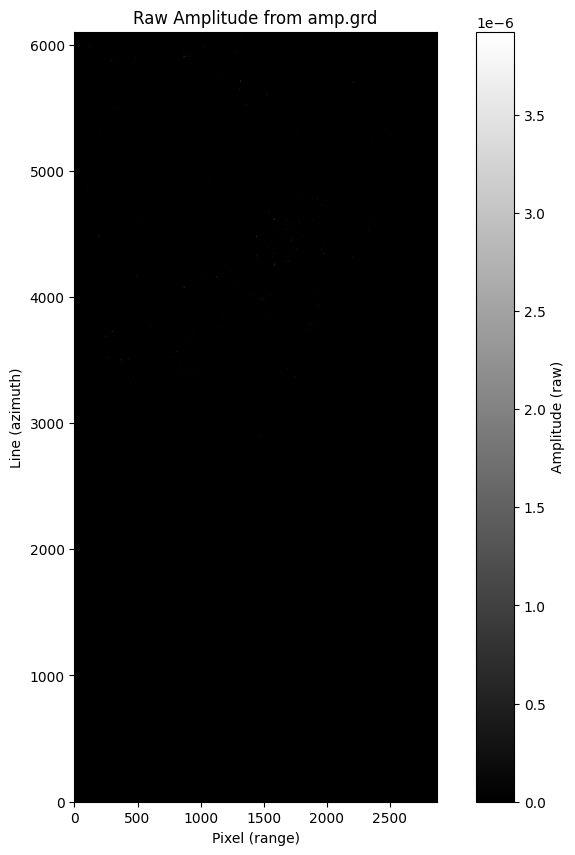

/home/ubuntu/anaconda3/envs/insar/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


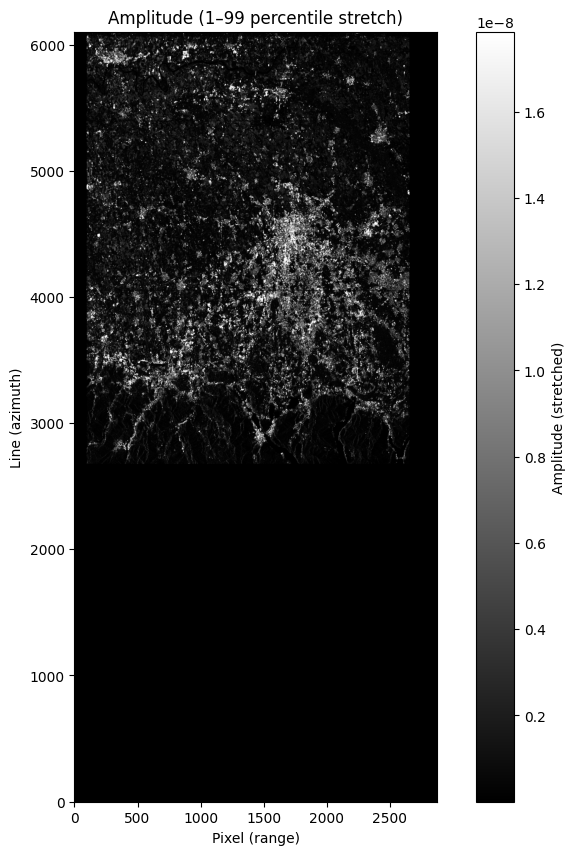

In [31]:
# 1. Amplitude (Combined)
# Backscatter strength (unitless), can be scaled by *1e6 if values are tiny
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset as NetCDFFile

amp_nc = NetCDFFile(str(ifg_path / "amp.grd"))
z = amp_nc.variables['z'][:]
z = np.flip(z, axis=0)

# Plot directly
plt.figure(figsize=(10, 10))
plt.imshow(z, cmap="gray", origin="lower")
plt.colorbar(label="Amplitude (raw)")
plt.title("Raw Amplitude from amp.grd")
plt.xlabel("Pixel (range)")
plt.ylabel("Line (azimuth)")
plt.show()
# Percentile stretch for visibility
vmin = np.percentile(z, 1)
vmax = np.percentile(z, 99)

plt.figure(figsize=(10, 10))
plt.imshow(z, cmap="gray", origin="lower", vmin=vmin, vmax=vmax)
plt.colorbar(label="Amplitude (stretched)")
plt.title("Amplitude (1–99 percentile stretch)")
plt.xlabel("Pixel (range)")
plt.ylabel("Line (azimuth)")
plt.show()


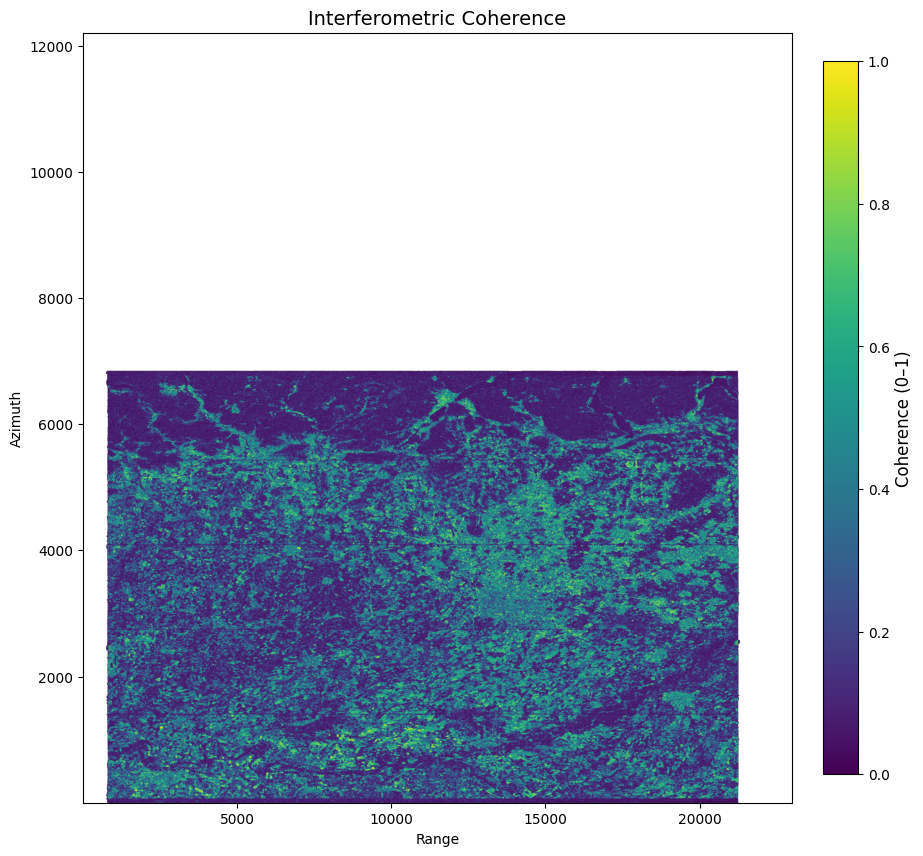

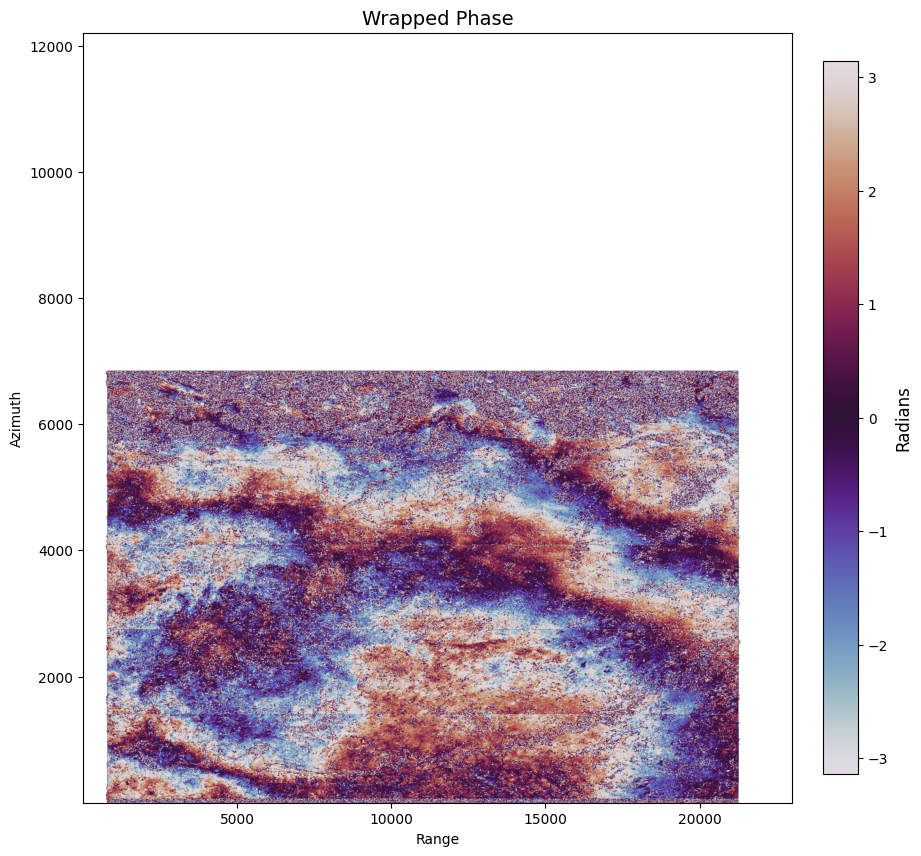

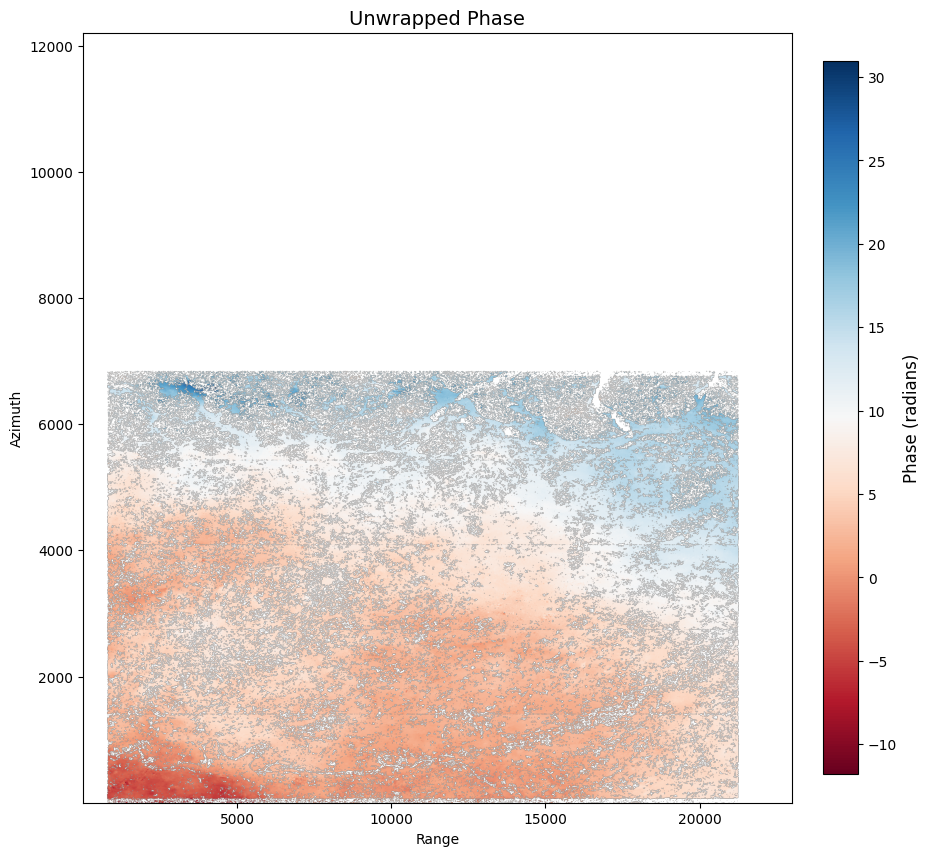

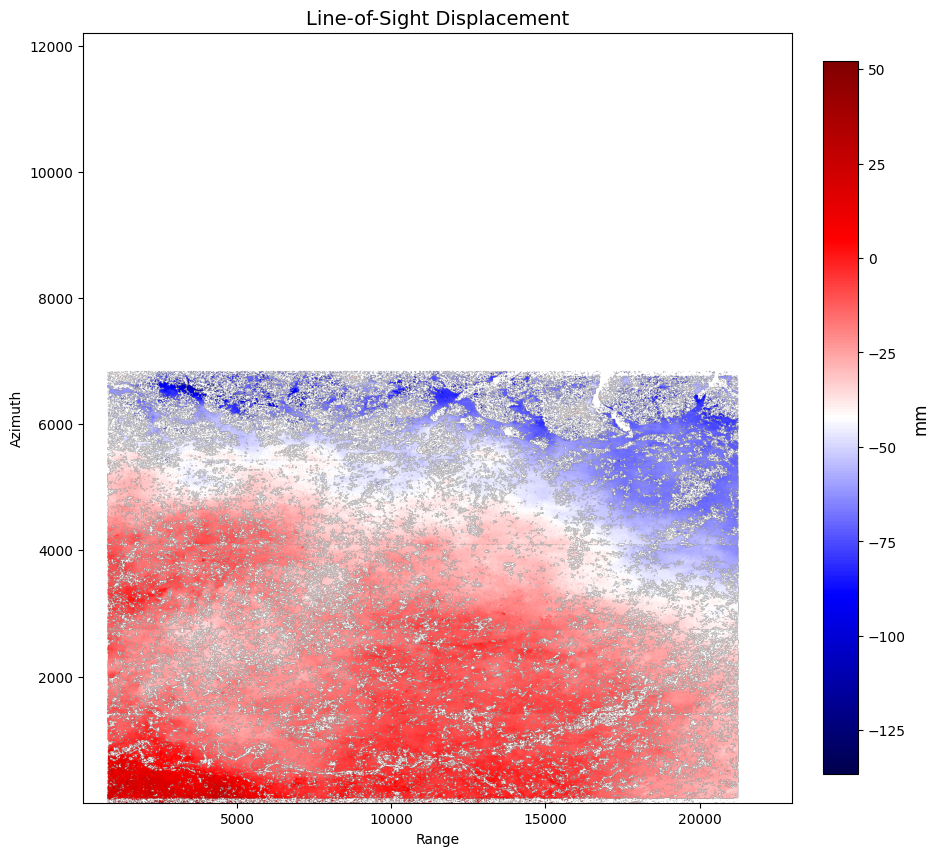

In [32]:

# 2. Coherence
# How stable the phase is [0–1]
plot_grd(ifg_path / "corr.grd",
         title="Interferometric Coherence",
         cmap="viridis", vmin=0, vmax=1, units="Coherence (0–1)")

# 3. Wrapped Phase
# Interferometric phase in radians
import numpy as np
plot_grd(ifg_path / "phase.grd",
         title="Wrapped Phase",
         cmap="twilight", vmin=-np.pi, vmax=np.pi, units="Radians")

# 4. Unwrapped Phase
# Continuous phase, usually in radians but can be scaled
plot_grd(ifg_path / "unwrap.grd",
         title="Unwrapped Phase",
         cmap="RdBu", units="Phase (radians)")

# 5. LOS Displacement
# Displacement along line-of-sight direction
plot_grd(ifg_path / "los.grd",
         title="Line-of-Sight Displacement",
         cmap="seismic", units="mm")
